## **HuggingFace**

Crea una cuenta en HugginFace.

Hugging Face se fundó en 2016 como una app de chatbot, pero en 2018 comenzó a liberar modelos NLP de forma open source, haciéndose popular.

Actualmente es una plataforma para acceder, usar y ajustar modelos y datasets preentrenados. Su éxito se debe en gran parte a librerías como Transformers (para secuencias de datos, inicialmente para texto, ahora se usan en más campos) y Diffusers (añadir ruido de forma gradual y aprender a quitarlo de forma gradual, muy aplicado en la generación de imágenes "creativas").

Buscamos en HuggingFace en NLP un modelo que nos guste.

Elegimos un traductor entre los idiomas English, French, Romanian, German.


https://huggingface.co/google-t5/t5-base

https://huggingface.co/docs/inference-providers/index

Miramos "Deploy inference providers".

En **Settings-Access tokens** creamos un token fine-grained y seleccionamos que pueda hacer llamadas a APIs.



In [3]:
!pip install huggingface_hub


   ---------------------------------------- 0/4 [pyyaml]
   ---------- ----------------------------- 1/4 [fsspec]
   ---------- ----------------------------- 1/4 [fsspec]
   ---------- ----------------------------- 1/4 [fsspec]
   ---------- ----------------------------- 1/4 [fsspec]
   ---------- ----------------------------- 1/4 [fsspec]
   ---------- ----------------------------- 1/4 [fsspec]
   -------------------- ------------------- 2/4 [filelock]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ------------------------------ --------- 3/4 [huggingface_hub]
   ----------

In [ ]:
!pip install python-dotenv

In [4]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.4 MB/s eta 0:00:00

   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]



Crea un fichero que se llame **.env** (puedes crearlo desde VSCode o en una terminal bash con ```python
 touch .venv```
 )



Dentro de **.venv** escribe línea a línea tus variables de entorno.

MY_API_KEY="123APIKEY_Example"

OTHER_KEY="123_Example_Example123"

In [1]:
from dotenv import dotenv_values

config = dotenv_values(".env")
config

OrderedDict([('API_HUGGINGFACE', 'hf_AQUI_VA_TU_CLAVE')])

In [22]:
config.keys()

odict_keys(['API_HUGGINGFACE'])

In [2]:
config['API_HUGGINGFACE']

'hf_AQUI_VA_TU_CLAVE'

In [40]:
## Vamos al model, buscamos Deploy - Inference providers - Usamos requests

import requests

API_URL = "https://router.huggingface.co/hf-inference/models/google-t5/t5-base"
headers = {
    "Authorization": f"Bearer {config['API_HUGGINGFACE']}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": "Hello, how are you?",
    "src_lang": "EN",
    "tgt_lang": "GE"
})



In [41]:
output

[{'translation_text': 'Hallo, wie sind Sie?'}]

Probemos ahora un modelo de difusión (gratuito y con una API accesible a través de requests)

https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

In [47]:
import requests

API_URL = "https://router.huggingface.co/hf-inference/models/stabilityai/stable-diffusion-xl-base-1.0"
headers = {
    "Authorization": f"Bearer {config['API_HUGGINGFACE']}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.content

image_bytes = query({
    "inputs": "A group of students that are very happy because they are learning a lot of Deep Learning and cloud",
})

# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

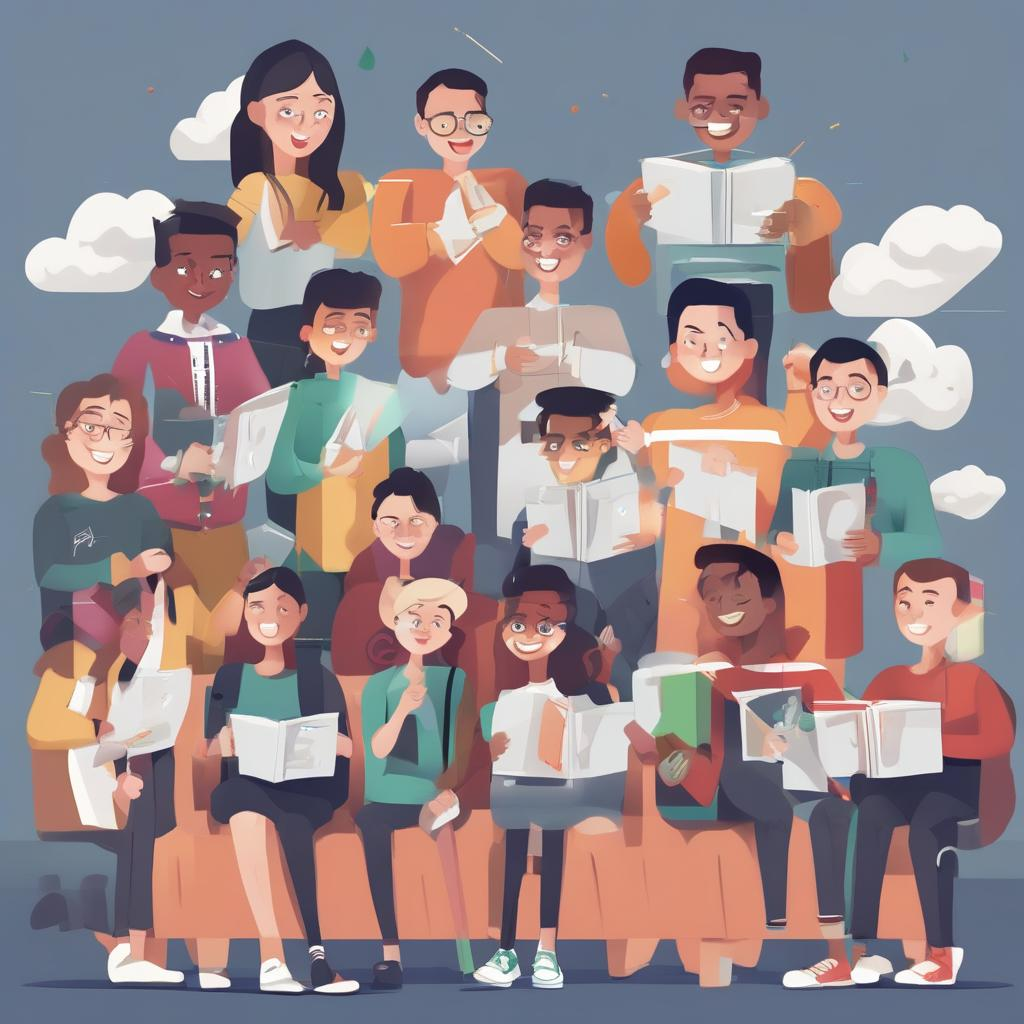

In [48]:
image

Creo que no ha entendido muy bien el cloud... :-)